In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from dataset import MSGDatasetBatched, MSGDatasetPoint
from tqdm import tqdm
import matplotlib.pyplot as plt

In [28]:
ds = MSGDatasetPoint('/scratch/snx3000/kschuurm/DATA/HRSEVIRI.zarr', 
                       y_vars=['SIS'],
                       x_vars=['channel_1', 'channel_2'],
                       patch_size=(15,15),
                        batch_size=10,
                      )


In [29]:
xarr = ds.ds

In [41]:
nans = xarr.channel_10.isnull()

In [42]:
nans.sum().values

array(1055094726)

In [43]:
nans_lon = nans.sum(dim=('lat','time'))
nans_lat = nans.sum(dim=('lon','time'))

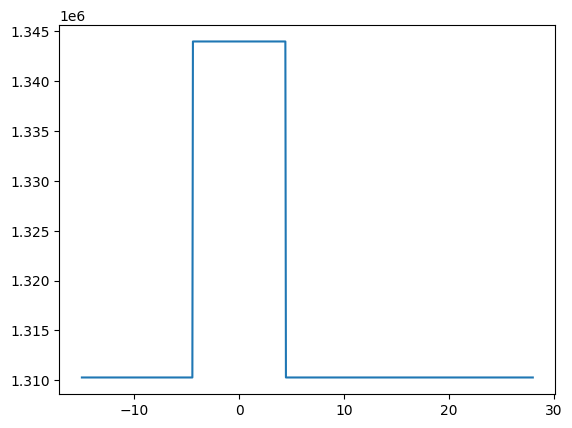

In [44]:
plt.plot(nans_lon.lon, nans_lon)

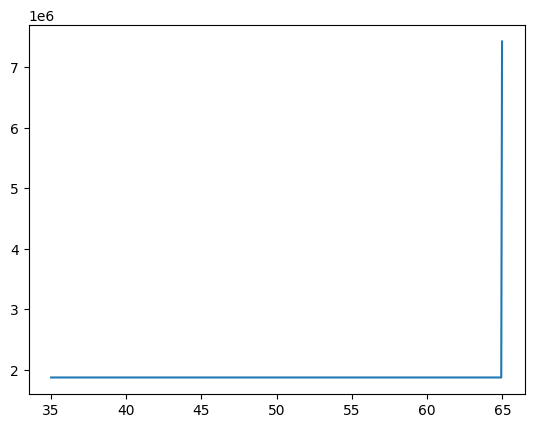

In [45]:
plt.plot(nans_lat.lat, nans_lat)

In [40]:
nans_lat.sel(lat=62, method='nearest').values

array(2193939)

In [27]:
a = nans_lat==0
a.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [47]:
xarr.lat[a.compute()]

<xarray.DataArray 'lat' (lat: 518)>
array([35.026834, 35.080501, 35.134168, ..., 62.665474, 62.719141, 62.772809])
Coordinates:
  * lat      (lat) float64 35.03 35.08 35.13 35.19 ... 62.61 62.67 62.72 62.77
Attributes:
    long_name:      latitude
    standard_name:  latitude
    units:          degrees_north